In [19]:
from fastai2.vision.all import *
from fastai2.vision.widgets import *
from utils import *

In [31]:
import zipfile
with zipfile.ZipFile('item.pkl', 'r') as zip_ref:
    zip_ref.extractall('Store')

In [4]:
df = pd.read_csv('list_attr_celeba.csv')
df = df[:5000]

In [5]:
df.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [35]:
ls

export.pkl


In [6]:
df.iloc[:,0]

0       000001.jpg
1       000002.jpg
2       000003.jpg
3       000004.jpg
4       000005.jpg
           ...    
4995    004996.jpg
4996    004997.jpg
4997    004998.jpg
4998    004999.jpg
4999    005000.jpg
Name: image_id, Length: 5000, dtype: object

In [7]:
df.replace(-1, False, inplace=True)
df.replace(1, True, inplace= True)
df2 = df.drop(['image_id'], axis=1)
df2

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,False,True,True,False,False,False,False,False,False,False,...,False,True,True,False,True,False,True,False,False,True
1,False,False,False,True,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,False,False,True,False,False,False,False,False,False,False,...,False,False,True,False,True,False,True,True,False,True
4,False,True,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,True,False,False,True,True,True,False,...,False,False,True,False,False,False,False,False,False,False
4996,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
4997,False,False,True,False,False,True,True,False,False,False,...,False,True,False,True,True,False,True,False,False,True
4998,False,False,False,True,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False


In [8]:
df2['labels'] = df2.apply(lambda item: ' '.join([col for col, a in zip(df2.columns, item) if a]), axis=1)

In [9]:
df2

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,labels
0,False,True,True,False,False,False,False,False,False,False,...,True,True,False,True,False,True,False,False,True,Arched_Eyebrows Attractive Brown_Hair Heavy_Makeup High_Cheekbones Mouth_Slightly_Open No_Beard Pointy_Nose Smiling Straight_Hair Wearing_Earrings Wearing_Lipstick Young
1,False,False,False,True,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,Bags_Under_Eyes Big_Nose Brown_Hair High_Cheekbones Mouth_Slightly_Open No_Beard Smiling Young
2,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,Big_Lips Blurry Male Narrow_Eyes No_Beard Pointy_Nose Wavy_Hair Young
3,False,False,True,False,False,False,False,False,False,False,...,False,True,False,True,False,True,True,False,True,Attractive No_Beard Pointy_Nose Straight_Hair Wearing_Earrings Wearing_Lipstick Wearing_Necklace Young
4,False,True,True,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,True,Arched_Eyebrows Attractive Big_Lips Heavy_Makeup Narrow_Eyes No_Beard Pointy_Nose Wearing_Lipstick Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,True,False,False,True,True,True,False,...,False,True,False,False,False,False,False,False,False,Bags_Under_Eyes Big_Lips Big_Nose Black_Hair Male No_Beard Straight_Hair
4996,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,Attractive Goatee Male Wearing_Hat Young
4997,False,False,True,False,False,True,True,False,False,False,...,True,False,True,True,False,True,False,False,True,Attractive Bangs Big_Lips Brown_Hair High_Cheekbones Narrow_Eyes No_Beard Smiling Wavy_Hair Wearing_Earrings Wearing_Lipstick Young
4998,False,False,False,True,False,False,False,True,False,False,...,True,False,False,False,False,False,False,True,False,Bags_Under_Eyes Big_Nose Blurry Chubby Double_Chin High_Cheekbones Male Mouth_Slightly_Open No_Beard Receding_Hairline Smiling Wearing_Necktie


In [10]:
df['label'] = df2['labels']
df = df[['image_id', 'label']]

In [11]:
dblock = DataBlock()

In [12]:
dsets = dblock.datasets(df)

In [13]:
len(dsets.train), len(dsets.valid)

(4000, 1000)

In [14]:
# Duplication problem, we're not feeding in a tuple properly, need some way to seperate
x,y = dsets.train[0]
x,y

(image_id                                                    004091.jpg
 label       High_Cheekbones Mouth_Slightly_Open No_Beard Smiling Young
 Name: 4090, dtype: object,
 image_id                                                    004091.jpg
 label       High_Cheekbones Mouth_Slightly_Open No_Beard Smiling Young
 Name: 4090, dtype: object)

In [20]:
def get_x(r): return path/'img_align_celeba'/'img_align_celeba'/r['image_id'] 
def get_y(r): return r['label'].split(' ')

In [16]:
path = Path('')

In [17]:
dblock = DataBlock(get_x = get_x, get_y = get_y)

In [18]:
dsets = dblock.datasets(df)
x,y = dsets.train[0]

In [19]:
# Properly formatted tuple with image filepath and labels
x,y

(Path('img_align_celeba/img_align_celeba/001362.jpg'),
 ['Arched_Eyebrows',
  'Attractive',
  'Bangs',
  'Big_Lips',
  'Black_Hair',
  'Heavy_Makeup',
  'High_Cheekbones',
  'No_Beard',
  'Pointy_Nose',
  'Rosy_Cheeks',
  'Smiling',
  'Wavy_Hair',
  'Wearing_Lipstick',
  'Young'])

In [20]:
dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock()),
                  get_x=get_x, get_y = get_y)
dsets = dblock.datasets(df)

In [21]:
# Now we have our image and the properly one-hot encoded labels
dsets.train[0]

(PILImage mode=RGB size=178x218,
 TensorMultiCategory([0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
         1., 1., 0., 1.]))

In [22]:
dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   #splitter=splitter random split is ok right now
                   get_x=get_x, 
                   get_y=get_y,
                   item_tfms = RandomResizedCrop(128, min_scale=0.35))
dls = dblock.dataloaders(df)

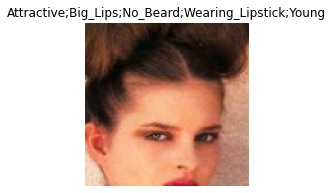

In [23]:
dls.show_batch(nrows=1, ncols=1)

In [24]:
learn = cnn_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learn.fine_tune(3, base_lr=3e-3, freeze_epochs=4)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.921920,0.676599,0.375550,00:11
1,0.772809,0.508341,0.453450,00:09
2,0.527825,0.318073,0.808400,00:09
3,0.401379,0.297642,0.817000,00:09


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.313213,0.275167,0.828150,00:12
1,0.289054,0.247659,0.852200,00:12
2,0.264120,0.242950,0.849250,00:12


In [25]:
predictions, targets = learn.get_preds()
accuracy_multi(predictions, targets, thresh=0.5, sigmoid=False)

TensorMultiCategory(0.8946)

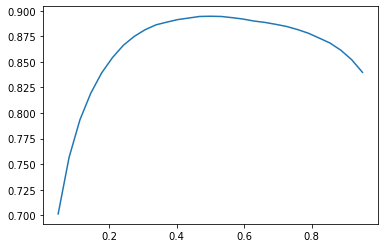

In [26]:
xs = torch.linspace(0.05, 0.95, 29)
accs = [accuracy_multi(predictions, targets, thresh=i, sigmoid=False) for i in xs]
plt.plot(xs, accs);

In [27]:
learn = cnn_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.5))
learn.fine_tune(3, base_lr=3e-3, freeze_epochs=4)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.918450,0.672585,0.634400,00:09
1,0.771861,0.515087,0.761050,00:09
2,0.526490,0.319152,0.864050,00:09
3,0.399278,0.296450,0.870175,00:09


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.313883,0.280391,0.877875,00:12
1,0.287847,0.253042,0.889250,00:12
2,0.264786,0.243968,0.893700,00:12


In [28]:
learn = cnn_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.5))
learn.fine_tune(10, base_lr=3e-3, freeze_epochs=4)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.910579,0.678587,0.630100,00:09
1,0.771453,0.524031,0.757200,00:09
2,0.524586,0.319491,0.863500,00:09
3,0.398409,0.298321,0.870250,00:09


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.311363,0.270507,0.881300,00:12
1,0.294332,0.257909,0.886600,00:12
2,0.280433,0.250444,0.891075,00:12
3,0.261613,0.245202,0.895250,00:12
4,0.247075,0.239659,0.897125,00:12
5,0.233618,0.240255,0.896900,00:12
6,0.217351,0.233803,0.898825,00:12
7,0.203801,0.232065,0.900825,00:12
8,0.193204,0.231501,0.900400,00:12
9,0.187428,0.231858,0.900625,00:12


In [36]:
path = Path('Store')
#learn.export()
learn2 = load_learner(path/'export.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'Store/export.pkl'

In [6]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [9]:
img = PILImage.create(btn_upload.data[-1])

In [10]:

#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [12]:
pred,pred_idx,probs = learn2.predict(img)

In [13]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}'#Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value="Prediction: (#3) ['Eyeglasses','Male','Sideburns']")

In [14]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [15]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn2.predict(img)
    lbl_pred.value = f'Prediction: {pred}' #' Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [16]:
btn_upload = widgets.FileUpload()

In [18]:
#hide_output
VBox([widgets.Label('Upload a selfie!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

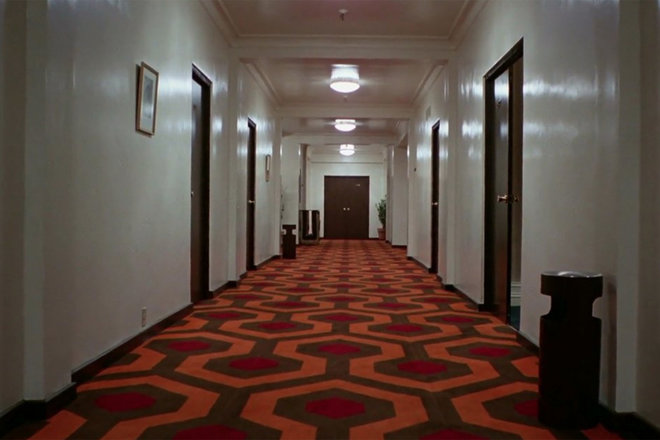

In [78]:
img = PILImage.create(btn_upload.data[-1])
img

In [63]:
btn_upload = widgets.FileUpload()
btn_run = widgets.Button(description='Classify')
btn_upload

FileUpload(value={}, description='Upload')

In [87]:
def classify_press(thingy):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(classify_press)

In [86]:
btn_run

Button(description='Classify', style=ButtonStyle())

AttributeError: type object 'PILImage' has no attribute 'creat'

TypeError: unsupported format string passed to Tensor.__format__

TypeError: unsupported format string passed to Tensor.__format__

TypeError: unsupported format string passed to Tensor.__format__

NameError: name 'learn_inf' is not defined

TypeError: unsupported format string passed to Tensor.__format__

TypeError: unsupported format string passed to Tensor.__format__

TypeError: unsupported format string passed to Tensor.__format__